<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/konlpy_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 44.9 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader

In [ ]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final/soynlp/newsresult.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
title_df = df['제목']

In [ ]:
print(len(title_df))

20000


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()

In [ ]:
tokenized_data = []
for sentence in title_df:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

제목의 최대 길이 : 41
제목의 평균 길이 : 12.29195


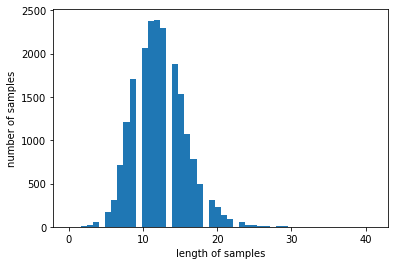

In [ ]:
# 제목 길이 분포 확인
print('제목의 최대 길이 :',max(len(title) for title in tokenized_data))
print('제목의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(5847, 100)

In [ ]:
model.wv.most_similar("코스피") #konlp_word2vec

[('마감', 0.9949448704719543),
 ('코스닥', 0.9824252724647522),
 ('황', 0.9652091264724731),
 ('뉴욕', 0.9637053608894348),
 ('종목', 0.9635204672813416),
 ('띄다', 0.9626842737197876),
 ('증시', 0.9622088670730591),
 ('메모', 0.9585026502609253),
 ('부고', 0.9559290409088135),
 ('카운트다운', 0.95062255859375)]